In [1]:
import sys
#!{sys.executable} -m pip install jupyterthemes
# !{sys.executable} -m pip install spacy
# !{sys.executable} -m pip install pyldavis
# !{sys.executable} -m spacy download en
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install biopython
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install tensorflow
# !{sys.executable} -m pip install imblearn
# !{sys.executable} -m pip install sklearn
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install xgboost
# !{sys.executable} -m pip install pyod
# !{sys.executable} -m pip install lightgbm
# !{sys.executable} -m pip install catboost 
# !{sys.executable} -m pip install plotly
# !{sys.executable} -m pip install cufflinks
# !{sys.executable} -m pip install pyclustering
# !{sys.executable} -m pip install beautifulsoup4
# !{sys.executable} -m pip install algorithmia
# !{sys.executable} -m pip install paramiko
# !{sys.executable} -m pip install gensim==3.8.3


In [19]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim import models
from gensim.models import LdaModel, CoherenceModel
from gensim.models.wrappers import LdaMallet
import pprint

# spacy for lemmatization
import spacy
from spacy.lang.en import English

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import pandas as pd
import numpy as np

import nltk
nltk.download('stopwords')

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\monju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
#reviews_datasets=pd.read_csv('D:/so-data/react-native-posts.csv'  )
reviews_datasets=pd.read_excel('D:/so-data/framework-related-posts/react-native.xlsx'  )
# reviews_datasets=reviews_datasets.head(1000)
# postTagsRawData = pd.read_csv('PostTagsV3.csv', chunksize=1000)
# postTagsRawData = pd.read_excel('PostsTags2.xlsx')
print(reviews_datasets.head(20))

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


          Id  AcceptedAnswerId  AnswerCount  \
0    2631087          10693863            4   
1   11075149          11075415            2   
2   11193167          11195065            1   
3   11213241          11216276            1   
4   11248095          11250724            2   
5   11458685          11462636            2   
6   11351689          11351873            6   
7   11585151          11585573            2   
8   11633008          11634409            1   
9   11587775          11588115            3   
10  11420650          11422086            1   
11  11636731          11637074            3   
12  11991426          11992898            1   
13  11874674          11875650            4   
14  12421993          12432399            3   
15  12428600          12432165            2   
16  10710635          10711253            1   
17  12900328          12901752            2   
18  12671673          12678861            2   
19  10559191          10559689            2   

            

In [21]:
reviews_datasets.dropna()

# obody = reviews_datasets['Body']

# changed to append both title and body
reviews_datasets['CombinedTitleBody'] = reviews_datasets['Title'] +' '+reviews_datasets['Body']
#reviews_datasets['CombinedTitleBody'] = reviews_datasets['Combined']
obody = reviews_datasets['CombinedTitleBody']

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
reviews_datasets.head()
#print(obody)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Id,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,LastActivityDate,...,ParentId,PostTypeId,Score,Tags,Title,ViewCount,Answer,AnswerDate,AnswerDiff,CombinedTitleBody
0,29925616,29930598,1,"<p>I have a row of controls/buttons, and each ...",NaN,2,NaN,2015-04-28 17:02:31.543,0,2015-04-29 13:00:59.327,...,0,1,0,<react-native>,How to repeat styles in React-native,1165,"<pre><code>&lt;View&gt;\n {['Left', 'Right', ...",2015-04-28 21:51:54.070,-4.0,How to repeat styles in React-native
1,30028086,30028347,1,<p>I am trying to re-render a component based ...,NaN,0,NaN,2015-05-04 10:40:24.633,1,2015-05-04 10:55:14.610,...,0,1,1,<javascript><reactjs><react-native>,Component not updating on props update,3195,<p>When <code>StoryContainer.handleClick</code...,2015-05-04 10:55:14.610,0.0,Component not updating on props update
2,29970434,29971118,3,"<p>For example, I wanna show a list of names. ...",NaN,0,NaN,2015-04-30 14:28:18.983,10,2017-07-22 06:13:22.307,...,0,1,48,<react-native><react-jsx>,How to concatenate JSX components in React Native,35591,<p>Figures I figure it out soon as I ask stack...,2015-04-30 14:59:07.690,0.0,How to concatenate JSX components in React Native
3,30113040,30113642,1,<p>I'm attempting to display an image and call...,NaN,0,NaN,2015-05-07 22:58:56.667,1,2015-05-08 05:01:34.900,...,0,1,0,<javascript><react-native>,Can't call function on react-native-video item,1476,<p>When you return a component from an event h...,2015-05-08 00:03:51.627,-2.0,Can't call function on react-native-video item
4,30012662,30012855,1,"<p>Im playing with React Native, and have depl...",NaN,0,NaN,2015-05-03 10:17:05.960,1,2015-05-03 10:40:34.920,...,0,1,1,<react-native>,Refresh On IPhone Device Using React-Native Tools,1355,<p>Shaking the device should bring up the deve...,2015-05-03 10:40:34.920,0.0,Refresh On IPhone Device Using React-Native Tools


In [22]:
from nltk import ngrams
from nltk.tokenize import sent_tokenize
import nltk

import re
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup

tokenizer = ToktokTokenizer()
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))
stop_words.update(['.',',','"',"'",'?','!',':', ";",', ',',  ',',   ', '(',')','[',']','{','}','#','...','--',"'s",'also',
                      '&','-','--','=','known','mi','km','$',"'",'`'])

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
def transform_text(text): 

    soup = BeautifulSoup(text)
    for elm in soup.find_all():
        if '<code>'== str(elm)[0:6]:
            elm.decompose()
    textStr = str(soup.get_text())
    textStr = textStr.replace('<html>','')
    textStr = textStr.replace('</html>','')
    textStr = textStr.replace('<body>','')
    textStr = textStr.replace('</body>','')
    textStr = textStr.replace('<p>','')
    textStr = textStr.replace('</p>','')
    textStr = textStr.replace('<pre>','')
    textStr = textStr.replace('</pre>','')
    
    #     remove lines
    textStr = textStr.strip()
    # remove numbers
    textStr = re.sub(r"\d","", textStr)
    
    return textStr

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
print(transform_text('<p>hello there I will kill you. Then I will be playing cricket <code>I am inside code</code> </p>134'))

hello there I will kill you. Then I will be playing cricket  


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
import re

# Convert to list
data = reviews_datasets.CombinedTitleBody.values.tolist()

# Remove new line characters
data = [re.sub(r'\s+', ' ', sent) for sent in data]
data = [transform_text(sent) for sent in data]

# Remove distracting single and double quotes
data = [re.sub("\'", "", sent) for sent in data]
data = [re.sub('\", "', '', sent) for sent in data]
data = [re.sub('\\"', '', sent) for sent in data]
data = [re.sub('\"', '', sent) for sent in data]
data = [re.sub('[\\:"]', '', sent) for sent in data]

# Remove web links
data = [re.sub(r'^https?:\/\/.*[\r\n]*', '', sent) for sent in data]

print(data[:3])

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['How to synchronize HTML local/webStorage and server-side storage?  Possible Duplicate Best way to synchronize local HTML DB (WebSQL Storage, SQLite) with a server ( way sync)   Im currently seeking solutions for transparently and automatically synchronizing and replicating across the client-side HTML localStorage or web storage and (maybe multiple) server-side storage(s) (the only requirement here that it should be simple and affordable to install on a regular hosting service). So do you have any experience with such libraries/technologies that offer data storage which automate the client-server storage synchronization and allow data to be available either offline or online or both? I think this is a fairly common scenario of web applications supporting offline mode...', 'Realtime backend platform for reporting / dashboards? I will build a dashboard system for my apps, where a page will have several widgets that draw charts, tables and glyphs representing potentially unrelated data. 

In [25]:
# Tokenize words and text clean up
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:3])

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['how', 'to', 'synchronize', 'html', 'local', 'webstorage', 'and', 'server', 'side', 'storage', 'possible', 'duplicate', 'best', 'way', 'to', 'synchronize', 'local', 'html', 'db', 'websql', 'storage', 'sqlite', 'with', 'server', 'way', 'sync', 'im', 'currently', 'seeking', 'solutions', 'for', 'transparently', 'and', 'automatically', 'synchronizing', 'and', 'replicating', 'across', 'the', 'client', 'side', 'html', 'localstorage', 'or', 'web', 'storage', 'and', 'maybe', 'multiple', 'server', 'side', 'storage', 'the', 'only', 'requirement', 'here', 'that', 'it', 'should', 'be', 'simple', 'and', 'affordable', 'to', 'install', 'on', 'regular', 'hosting', 'service', 'so', 'do', 'you', 'have', 'any', 'experience', 'with', 'such', 'libraries', 'technologies', 'that', 'offer', 'data', 'storage', 'which', 'automate', 'the', 'client', 'server', 'storage', 'synchronization', 'and', 'allow', 'data', 'to', 'be', 'available', 'either', 'offline', 'or', 'online', 'or', 'both', 'think', 'this', 'is', 

In [26]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=75) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=75)  


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
# See trigram example
print(trigram_mod[bigram_mod[data_words[3]]])

['how', 'can', 'evaluate', 'dart', 'performance', 'google', 'is', 'launching', 'new', 'language', 'promising', 'that', 'it', 'has', 'better', 'performance', 'but', 'how', 'can', 'evaluate', 'performance', 'in', 'dart', 'source', 'code', 'lets', 'take', 'as', 'example', 'the', 'sun', 'flower', 'drawframe', 'method', 'if', 'we', 'have', 'lots', 'of', 'could', 'we', 'add', 'statement', 'to', 'evaluate', 'elapsed', 'time', 'within', 'google', 'promises', 'better', 'performance', 'later', 'on', 'when', 'there', 'is', 'native', 'dart', 'in', 'the', 'browser', 'for', 'now', 'dart', 'compiles', 'directly', 'to', 'javascript', 'and', 'is', 'larger', 'and', 'slower', 'than', 'writing', 'pure', 'javascript', 'the', 'function', 'you', 'have', 'right', 'there', 'is', 'actually', 'identical', 'in', 'pure', 'javascript', 'so', 'the', 'runtime', 'ought', 'to', 'be', 'very', 'nearly', 'the', 'same', 'between', 'compiled', 'dart', 'and', 'direct', 'javascript', 'version', 'you', 'could', 'compare', 'the

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
spacy.load('en_core_web_sm')

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
#spacy.load('en_core_web_sm')

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
reviews_datasets.head(20)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,LastActivityDate,LastEditDate,...,Score,Tags,Title,ViewCount,Answer,AnswerDate,AnswerDiff,Combined,AcceptedAnswerCount,CombinedTitleBody
Id,,,,,,,,,,,,,,,,,,,,,
29840659,29850099,1,<p>Integration with Existing App</p>\n\n<p>The...,NaN,0,NaN,2015-04-24 06:54:41.913,0,2015-04-24 14:27:29.133,NaN,...,1,<ios><react-native>,ReactNative Integration with Existing App not ...,380,<p>Just update the version to 0.4.0 </p>\n\n<p...,2015-04-24 14:27:29.133,27168.0,ReactNative Integration with Existing App not ...,1,ReactNative Integration with Existing App not ...
29966040,30008487,1,<p>I have a react-native component with PanRes...,NaN,1,NaN,2015-04-30 11:03:19.760,0,2015-05-02 23:07:08.673,NaN,...,0,<javascript><reactjs><react-native>,Styles not updating inside Component,865,<p>You're using React wrong.</p>\n\n<ol>\n<li>...,2015-05-02 23:07:08.673,216229.0,Styles not updating inside Component <p>I have...,1,Styles not updating inside Component <p>I have...
29925616,29930598,1,"<p>I have a row of controls/buttons, and each ...",NaN,2,NaN,2015-04-28 17:02:31.543,0,2015-04-29 13:00:59.327,2015-04-29 13:00:59.327,...,0,<react-native>,How to repeat styles in React-native,1165,"<pre><code>&lt;View&gt;\n {['Left', 'Right', ...",2015-04-28 21:51:54.070,17363.0,How to repeat styles in React-native <p>I have...,1,How to repeat styles in React-native <p>I have...
30012662,30012855,1,"<p>Im playing with React Native, and have depl...",NaN,0,NaN,2015-05-03 10:17:05.960,1,2015-05-03 10:40:34.920,NaN,...,1,<react-native>,Refresh On IPhone Device Using React-Native Tools,1355,<p>Shaking the device should bring up the deve...,2015-05-03 10:40:34.920,1409.0,Refresh On IPhone Device Using React-Native To...,1,Refresh On IPhone Device Using React-Native To...
29970434,29971118,3,"<p>For example, I wanna show a list of names. ...",NaN,0,NaN,2015-04-30 14:28:18.983,10,2017-07-22 06:13:22.307,2016-01-30 10:56:28.147,...,48,<react-native><react-jsx>,How to concatenate JSX components in React Native,35591,<p>Figures I figure it out soon as I ask stack...,2015-04-30 14:59:07.690,1849.0,How to concatenate JSX components in React Nat...,1,How to concatenate JSX components in React Nat...
30028086,30028347,1,<p>I am trying to re-render a component based ...,NaN,0,NaN,2015-05-04 10:40:24.633,1,2015-05-04 10:55:14.610,NaN,...,1,<javascript><reactjs><react-native>,Component not updating on props update,3195,<p>When <code>StoryContainer.handleClick</code...,2015-05-04 10:55:14.610,890.0,Component not updating on props update <p>I am...,1,Component not updating on props update <p>I am...
30113040,30113642,1,<p>I'm attempting to display an image and call...,NaN,0,NaN,2015-05-07 22:58:56.667,1,2015-05-08 05:01:34.900,NaN,...,0,<javascript><react-native>,Can't call function on react-native-video item,1476,<p>When you return a component from an event h...,2015-05-08 00:03:51.627,3895.0,Can't call function on react-native-video item...,1,Can't call function on react-native-video item...
29291286,29301078,2,<p>Can an <code>iOS</code> app (built entirely...,NaN,0,NaN,2015-03-27 00:26:46.613,0,2017-10-27 16:27:37.357,2015-03-27 00:50:17.330,...,10,<javascript><ios><xcode><cordova><react-native>,Run a React Native app without launching Xcode?,4339,"<p>If you build the project once using Xcode, ...",2015-03-27 12:47:52.890,44466.0,Run a React Native app without launching Xcode...,1,Run a React Native app without launching Xcode...
29290299,29304365,1,<p>After installing react-native and running t...,NaN,1,NaN,2015-03-26 22:50:57.560,0,2018-04-02 14:50:36.677,2018-04-02 14:50:36.677,...,3,<ios><react-native>,Error running the initialised React Native pro...,2077,<p>To run on a device (which is your second pr...,2015-03-27 15:27:44.870,59807.0,Error running the initialised React Native pro...,1,Error running the initialised React Native pro...


In [30]:
print(data_lemmatized[:2])

reviews_datasets['topics']=data_lemmatized
reviews_datasets['obody']=obody
cview = reviews_datasets['ViewCount'].astype(int)
avgfav = reviews_datasets['FavoriteCount'].astype(int)
avgscore = reviews_datasets['Score'].astype(int)
body = reviews_datasets['Body']
titles = reviews_datasets['Title']
caccepans = reviews_datasets['AcceptedAnswerCount']
ansdelay = reviews_datasets['AnswerDiff']
avgdelay = ansdelay.fillna(0)
reviews_datasets.head(20)
#reset option to default value

[['synchronize', 'html', 'local', 'webstorage', 'server', 'side', 'storage', 'possible', 'duplicate', 'good', 'way', 'synchronize', 'local', 'html', 'websql', 'storage', 'sqlite', 'server', 'way', 'sync', 'm', 'currently', 'seek', 'solution', 'transparently', 'automatically', 'synchronize', 'replicating', 'client', 'side', 'html', 'localstorage', 'web', 'storage', 'maybe', 'multiple', 'server', 'side', 'storage', 'requirement', 'simple', 'affordable', 'install', 'regular', 'host', 'service', 'experience', 'library', 'technology', 'offer', 'datum', 'storage', 'automate', 'client', 'server', 'storage', 'synchronization', 'allow', 'datum', 'available', 'offline', 'online', 'think', 'fairly', 'common', 'scenario', 'web', 'application', 'support', 'offline', 'mode'], ['realtime', 'backend', 'platform', 'reporting', 'dashboard', 'build', 'dashboard', 'system', 'app', 'page', 'several', 'widget', 'draw', 'chart', 'table', 'glyph', 'represent', 'potentially', 'unrelated', 'datum', 'client', 'h

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Id,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,LastActivityDate,...,ViewCount,post_id,Answer,AnswerDate,AnswerDiff,Combined,AcceptedAnswerCount,CombinedTitleBody,topics,obody
0,2631087,10693863,4,<blockquote>\n <p><strong>Possible Duplicate:...,2012-10-09 06:29:55.193,1,NaN,2010-04-13 15:58:40.803,16,2020-04-16 11:05:57.350,...,34768,2631087,"<p><a href=""http://www.firebase.com/how-it-wor...",2012-05-21 23:19:45.220,66468065,How to synchronize HTML5 local/webStorage and ...,1,How to synchronize HTML5 local/webStorage and ...,"[synchronize, html, local, webstorage, server,...",How to synchronize HTML5 local/webStorage and ...
1,11075149,11075415,2,<p>I will build a dashboard system for my apps...,NaN,0,NaN,2012-06-17 22:02:14.640,2,2014-03-14 19:35:59.440,...,1845,11075149,"<p>Firebase offers both the ""notify in relatim...",2012-06-17 22:55:13.927,3179,Realtime backend platform for reporting / dash...,1,Realtime backend platform for reporting / dash...,"[realtime, backend, platform, reporting, dashb...",Realtime backend platform for reporting / dash...
2,11193167,11195065,1,<p>I'm working on a solution to intercept chan...,NaN,0,NaN,2012-06-25 16:19:10.690,0,2012-06-25 18:25:29.290,...,375,11193167,<p>Thanks for sharing your ideas!</p>\n\n<p>We...,2012-06-25 18:25:29.290,7579,intercept data changes and alter/validate from...,1,intercept data changes and alter/validate from...,"[intercept, datum, change, alter, validate, se...",intercept data changes and alter/validate from...
3,11213241,11216276,1,"<pre><code>var ref1 = new Firebase(""http://gam...",NaN,0,NaN,2012-06-26 17:58:12.623,0,2012-06-29 18:34:21.197,...,1509,11213241,<p>Commas are allowed in Firebase keys. There ...,2012-06-26 21:33:32.143,12920,Can Firebase entries include commas in their n...,1,Can Firebase entries include commas in their n...,"[firebase, entry, include, comma, name, name, ...",Can Firebase entries include commas in their n...
4,11248095,11250724,2,<p>I want to create a queue where clients can ...,NaN,0,NaN,2012-06-28 15:37:46.720,12,2016-03-23 20:00:04.083,...,2542,11248095,"<p>Wow, great question. This is a usage patte...",2012-06-28 18:25:19.643,10053,How can I create a queue with multiple workers...,1,How can I create a queue with multiple workers...,"[create, queue, multiple, worker, want, create...",How can I create a queue with multiple workers...
5,11458685,11462636,2,<p>I've been reading the firebase documentatio...,NaN,0,NaN,2012-07-12 18:54:19.117,0,2015-05-29 04:49:11.260,...,3723,11458685,<p>Firebase doesn't produce developer-consumab...,2012-07-13 00:37:03.417,20564,How does or how can you effectively handle err...,1,How does or how can you effectively handle err...,"[effectively, handle, error, use, firebase, ve...",How does or how can you effectively handle err...
6,11351689,11351873,6,<p>Is there a strategy that would work within ...,NaN,0,NaN,2012-07-05 19:59:44.270,26,2019-10-23 14:33:22.300,...,55682,11351689,"<p>This is a commonly requested feature, and w...",2012-07-05 20:12:08.203,744,Detect if Firebase connection is lost/regained...,1,Detect if Firebase connection is lost/regained...,"[detect, firebase, connection, lose, regained,...",Detect if Firebase connection is lost/regained...
7,11585151,11585573,2,<p>I have a Firebase with a <code>users</code>...,NaN,0,NaN,2012-07-20 18:41:20.430,0,2012-07-23 14:35:18.250,...,811,11585151,<p>The issue here is that .on() doesn't (in ge...,2012-07-20 19:11:17.337,1797,Firebase field delayed update <p>I have a Fire...,1,Firebase field delayed update <p>I have a Fire...,"[firebase, field, delay, update, firebase, ref...",Firebase field delayed update <p>I have a Fire...
8,11633008,11634409,1,<p>This is the basic idea of my code. I remove...,NaN,3,NaN,2012-07-24 14:26:28.447,0,2012-07-24 15:38:14.743,...,1845,11633008,<p>I think Kato's comment is right on. If you...,2012-07-24 15:38:14.743,4306,Firebase child_removed not being c

In [25]:
reviews_datasets.to_csv("D:/so-data/output1.csv")

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
import os
from gensim.models.wrappers import LdaMallet

os.environ['MALLET_HOME'] = 'D:\\so-data\\mallet-2.0.8\\mallet-2.0.8'

mallet_path = 'D:\\so-data\\mallet-2.0.8\\mallet-2.0.8\\bin\\mallet'

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=30, id2word=id2word, optimize_interval=10, iterations=1500)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# gensim.models.LdaModel?

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# Compute Coherence Score
# coherence_model_ldamallet = CoherenceModel(model=lda_mallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
# coherence_ldamallet = coherence_model_ldamallet.get_coherence()
# print('\nCoherence Score: ', coherence_ldamallet)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=15, step=5):
    """
    Compute c_v coherence for various number of topics
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:


model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=5, limit=55, step=5)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5
10
15
20
25
30
35
40
45
50


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


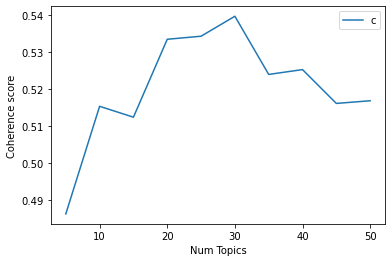

In [35]:
#Show graph
limit=55; start=5; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [25]:
# print(coherence_values)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
def calculate_best_iterations(number_of_topics, number_of_iterations):
    print(number_of_iterations)
    lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus = corpus, num_topics= number_of_topics, id2word= id2word, iterations= number_of_iterations)
    coherence_model_ldamallet = CoherenceModel(model=lda_mallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    iterations.append(number_of_iterations)
    iteration_based_coherence_values.append(coherence_model_ldamallet.get_coherence())

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


500
1000
1500
2000
2500
3000


ValueError: x and y must have same first dimension, but have shapes (5,) and (6,)

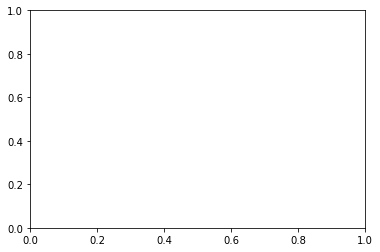

In [37]:
iterations = []
iteration_based_coherence_values = []

for i in [500,1000,1500,2000,2500, 3000]:
    calculate_best_iterations(30, i)

#Show graph
limit=3000; start=500; step=500;
x = range(start, limit, step)
plt.plot(x, iteration_based_coherence_values)
plt.xlabel("Num of iterations")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [39]:
for i in iteration_based_coherence_values:
    print(i)

0.5254722522583457
0.5342891016482596
0.542794958945688
0.5371346738538967
0.5398541505171685
0.5365649243145479


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: x and y must have same first dimension, but have shapes (5,) and (6,)

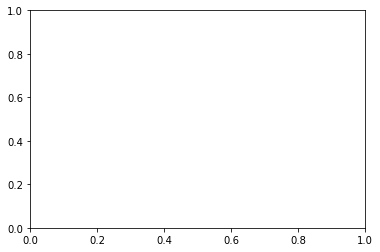

In [40]:
#Show graph
limit=3000; start=500; step=500;
x = range(start, limit, step)
plt.plot(x, iteration_based_coherence_values)
plt.xlabel("Num of iterations")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [41]:
lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=30 ,iterations=1500, id2word=id2word,  alpha=5)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
#print topics

#print(lda_mallet.show_topics(num_topics=-1, num_words=25, formatted=False))
topic_number = []
topics = []

for i in lda_mallet.show_topics(num_topics=50, num_words=10, formatted=False):
    value_map_keyword = {}
    value_list = []
    key_words_list = []
    for j in i[1]:
        value_map_keyword[j[1]] = j[0]
        value_list.append(j[1])
        key_words_list.append(j[0])
   
    topic_number.append(i[0]+1)
    topics.append(',  '.join(map(str, key_words_list)))
    
topic_dataframe = pd.DataFrame({'Topic-Number': topic_number, 'Keywords': topics})
topic_dataframe.to_csv("D:/so-data/final-data/react_native_topic_keywords.csv")

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
#Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=lda_mallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.5159715138291566


In [44]:
###################################
# topic development
###################################

def format_topics_sentences(ldamodel=lda_mallet, corpus=corpus, texts=data_lemmatized, title=data_lemmatized):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    contents2 = pd.Series(title)
    sent_topics_df = pd.concat([sent_topics_df, contents, contents2], axis=1)
    return(sent_topics_df)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_mallet, corpus=corpus, texts=body, title=titles)

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'texts', 'title']
df_dominant_topic.to_csv("D:/so-data/final-data/final_topics_with_body_react_native.csv")

C:\tools\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
